In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [13]:
df = pd.read_csv('Abandono_Clientes_Bancarios.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [15]:
edad_clientes = df['Age']
edad_clientes.value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

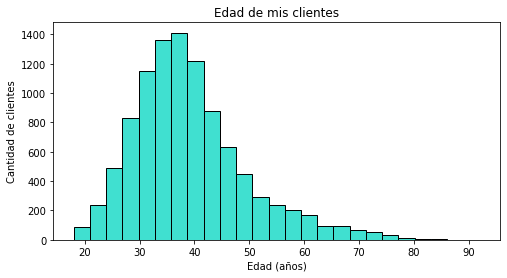

In [16]:
fig, ax = plt.subplots(figsize=(8,4))

ax.set_title('Edad de mis clientes')
ax.set_xlabel('Edad (años)')
ax.set_ylabel('Cantidad de clientes')

x_hist = edad_clientes.values.flatten()
ax.hist(x_hist, bins= 25, ec='black', color='turquoise');

En el gráfico anterior podemos apreciar la edad de nuestros clientes. Se puede ver que la mayoría rondan entre los 25 y los 50 años. En base a esta información podríamos ver que tan propensos son de abandonar estos pagos bancarios y así poder ver la relación con las edades. Su distribución se asemeja a una distribución Chi Cuadrado. 

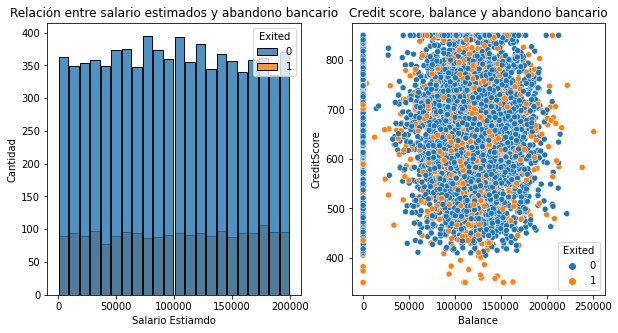

In [18]:
f, axs = plt.subplots(1,2, figsize=(10,5))

sns.histplot(data=df, x="EstimatedSalary", hue="Exited", shrink=.9, alpha=.8, legend=True, ax=axs[0])
sns.scatterplot(data=df, x="Balance", y="CreditScore", hue="Exited", ax=axs[1]);

axs[0].set_title('Relación entre salario estimados y abandono bancario')
axs[0].set_xlabel('Salario Estiamdo')  
axs[0].set_ylabel('Cantidad');

axs[1].set_title('Credit score, balance y abandono bancario')
axs[1].set_xlabel('Balance')
axs[1].set_ylabel('CreditScore');

En el primer gráfico vemos la relación que existe entre el salario estimado del cliente y la tasa de abandono que tiene. En el segundo gráfico vemos la relación que hay entre el balance, el creditscore y si el cliente abandonó, apreciamos una línea recta en el x=0 debido a que hay muchos clientes que tienen el balance en cero. Lo interesante de estas gráficas es que estamos relacionando nuestra variable mas importante (Exited) con el salario estimado de los clientes, su balance y su creditscore.
A priori, es de esperarse que personas con el salario esperado mas bajo abandonen mas fácil, así también con personas con menor balance y menos creditscore. El segundo gráfico nos termina relacionando el balance del cliente con su creditscore y allí nos indica con color naranja los clientes que abandonaron, no se observa ninguna distribución.

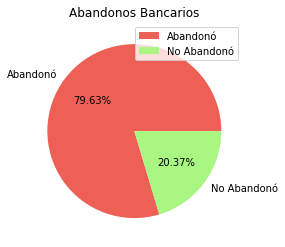

In [32]:
cantidad_abandonos = df['Exited'].value_counts()
labels = ['Abandonó','No Abandonó']
colores = ["#EE6055", "#AAF683"]
plt.pie(x = cantidad_abandonos, labels = labels, autopct = '%.2f%%', colors= colores)
plt.title("Abandonos Bancarios")
plt.legend()
plt.show()

El gráfico anterior nos muestra nuestra variable de interés en un gráfico de torta. Comparamos la variable "Exited" teniendo el cuenta el porcentaje de abandonos y los que no abandonaron. Puede ser útil para ver relaciones entre variables.

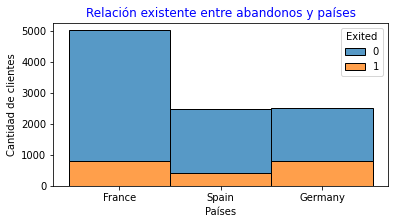

In [20]:
fig, ax = plt.subplots(figsize=(6,3))

sns.histplot(data=df, x="Geography", hue="Exited", multiple="stack");

ax.set_title('Relación existente entre abandonos y países', color='blue')
ax.set_xlabel('Países')
ax.set_ylabel('Cantidad de clientes');

Este gráfico nos muestra la relación que existe entre la tasa de abandono bancario y los paises. Se observa que la relación que tiene Alemania entre abandonos/no abandonos en mayor que en la de los otros dos países (Francia y España).

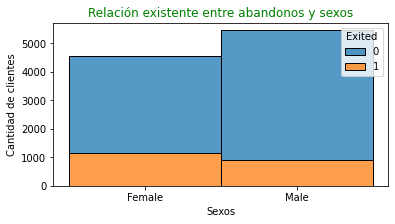

In [21]:
fig, ax = plt.subplots(figsize=(6,3))

sns.histplot(data=df, x="Gender", hue="Exited", multiple="stack");

ax.set_title('Relación existente entre abandonos y sexos', color='green')
ax.set_xlabel('Sexos')
ax.set_ylabel('Cantidad de clientes');

El gráfico anterior nos muestra la relación entre abandono/no abandono y los sexos (masculino y femenino). Observamos que dicha relación es mayor en el sexo femenino que en el masculino. 

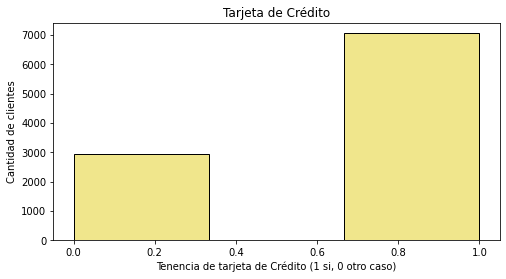

In [22]:
tarjeta_clientes = df['HasCrCard']

fig, ax = plt.subplots(figsize=(8,4))

ax.set_title('Tarjeta de Crédito')
ax.set_xlabel('Tenencia de tarjeta de Crédito (1 si, 0 otro caso)')
ax.set_ylabel('Cantidad de clientes')

x_hist = tarjeta_clientes.values.flatten()
ax.hist(x_hist, bins= 3, color='khaki', ec='black');

In [23]:
tarjeta_clientes.value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

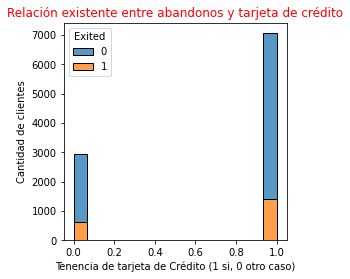

In [24]:
fig, ax = plt.subplots(figsize=(4,4))

sns.histplot(data=df, x="HasCrCard", hue="Exited", multiple="stack");

ax.set_title('Relación existente entre abandonos y tarjeta de crédito', color='red')
ax.set_xlabel('Tenencia de tarjeta de Crédito (1 si, 0 otro caso)')
ax.set_ylabel('Cantidad de clientes');

En el gráfico anterior podemos ver la relación que existe entre la tenencia de una tarjeta de crédito y el abandono. La relación abandono/no abandono es mas notoria en personas que no tienen tarjeta de crédito. En cambio, clientes que tienen tarjeta de crédito, parece ser que abandonan menos.

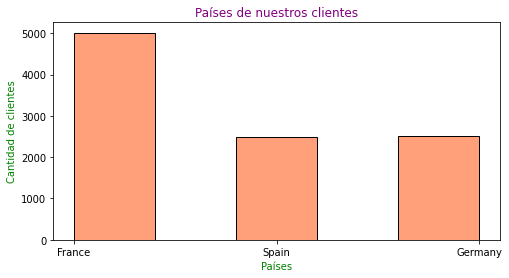

In [34]:
paises_clientes = df['Geography']
fig, ax = plt.subplots(figsize=(8,4))

ax.set_title('Países de nuestros clientes', color='purple')
ax.set_xlabel('Países', color='green')
ax.set_ylabel('Cantidad de clientes', color='green')

x_hist = paises_clientes.values.flatten()
ax.hist(x_hist, bins= 5, color='lightsalmon', ec='black');


In [26]:
paises_clientes.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Observamos mayor cantidad de clientes de Francia, luego Alemania y por ultimo España.